### Question 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path variable

path = r'/Users/davidcarpenter/Documents/Instacart Basket Analysis'

In [3]:
# Import the dataframe

df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ex4-9-exercise-part-1.pkl'))

In [4]:
# Rename column 'Surnam' to 'last_name'

df_combined = df_combined.rename(columns={'Surnam': 'last_name'})

In [5]:
# Drop column that wasn't being used

df_combined = df_combined.drop('Unnamed: 0_x', axis=1)

In [6]:
# Drop column that wasn't being used

df_combined = df_combined.drop('Unnamed: 0_y', axis=1)

### Question 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

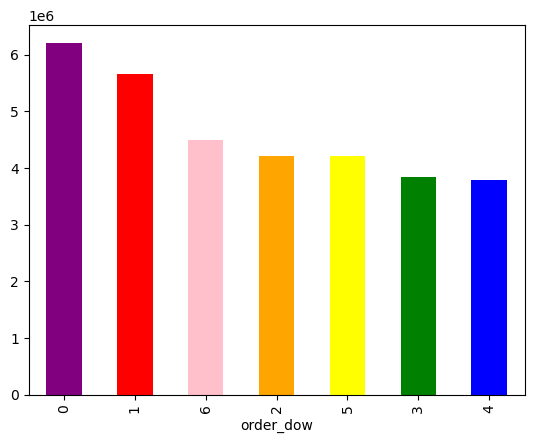

In [7]:
# Bar chart

bar_chart = df_combined['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
# Export the bar chart

bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_bar_chart_orders_dow.png'))

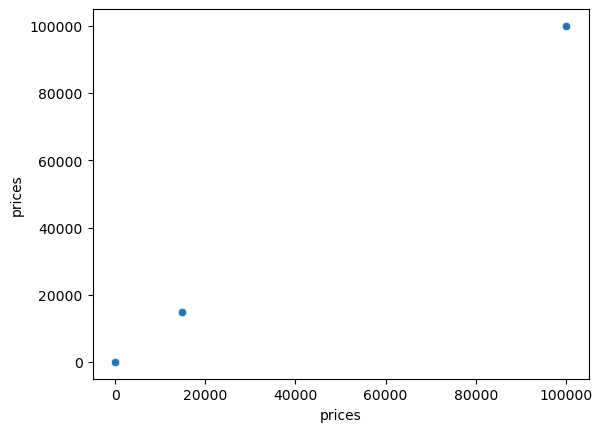

In [9]:
# Scatterplot

scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [10]:
# Export the scatterplot

scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_scatterplot_prices.png'))

In [11]:
# Histogram
# There were some outliers in the dataset so I changed rows that have prices greater than 100 to 'missing' values.

df_combined.loc[df_combined['prices'] > 100, 'prices'] = np.nan

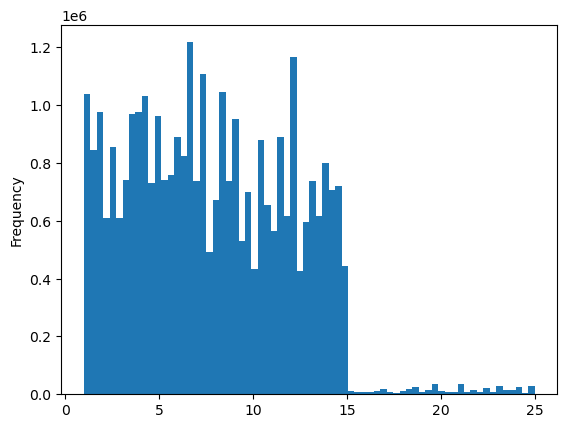

In [12]:
hist_2 = df_combined['prices'].plot.hist(bins = 70)

In [13]:
# Export the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_hist_prices.png'))

In [14]:
# Create seed

np.random.seed(4)

In [15]:
# Create 70% part of array

dev = np.random.rand(len(df_combined)) <= 0.7

In [16]:
# Check array 'dev'

dev

array([False,  True, False, ..., False,  True,  True])

In [17]:
# Store 70% of the same in the dataframe named 'big'

big = df_combined[dev]

In [18]:
# Store 30% of the same in the dataframe named 'small'

small = df_combined[~dev]

In [19]:
# Check length of 'df_combined' dataframe

len(df_combined)

32434212

In [20]:
# Check length of 'big' and 'small' dataframes to confirm split occurred correctly

len(big) + len(small)

32434212

In [21]:
# Creating smaller data frame with only needed columns for line chart

df_combined_reduced = small[['order_dow','prices']]

In [24]:
# Check data types of 'order_dow' and 'prices' because warnings are appearing when creating visualizations
# and I don't know why.

df_combined_reduced.dtypes

order_dow      int64
prices       float64
dtype: object

In [27]:
# Check min and max values of 'order_dow' and 'prices' because warnings are appearing when creating visualizations
# and I don't know why.

result = df_combined_reduced.agg(['min', 'max'])

In [28]:
# View 'result'

result

,order_dow,prices
min,0,1.0
max,6,25.0


/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


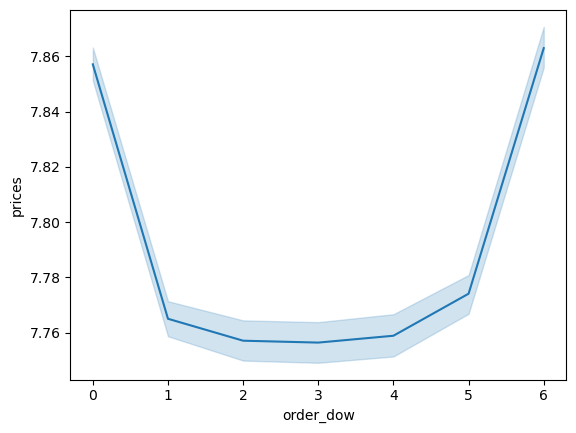

In [29]:
# Creating line chart from 'small' sample set

line = sns.lineplot(data = df_combined_reduced, x = 'order_dow', y = 'prices')

In [30]:
# Export the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_line_prices_dow.png'))

### Question 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. 

#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

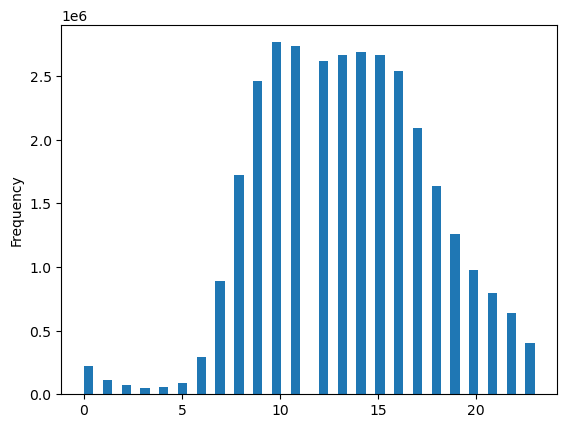

In [31]:
hist = df_combined['order_hour_of_day'].plot.hist(bins = 48)

#### The histogram shows that the most orders occur during the 10 o'clock hour. The next highest number of orders occur at 11 o'clock. No orders occur during the 12 o'clock (mid-day) or at 12 0'clock (midnight) hours.

In [32]:
# Export the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_hist_prices_2.png'))

### Question 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [33]:
df_combined.shape

(32434212, 34)

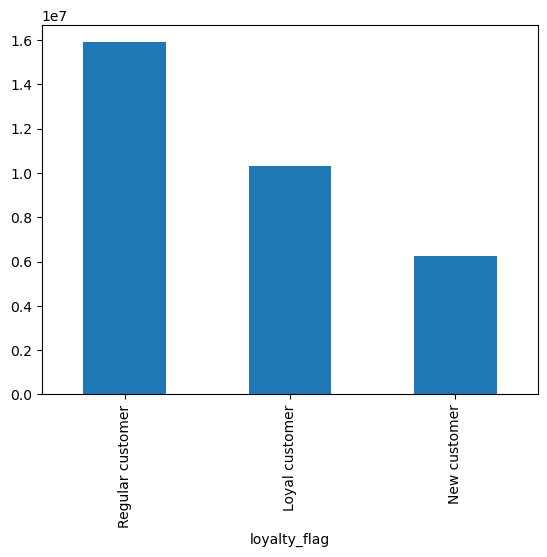

In [34]:
loyalty_hist = df_combined['loyalty_flag'].value_counts().plot.bar()

#### Customer type definitions:
##### Loyal customers made more than 40 orders
##### Regular customers made fewer than 40 and more than 10 orders
##### New customers made 10 or fewer orders

### The bar chart shows that regular customers account for the majority of cutomer types and new customers the fewest. Loyal customers make up a little more than half the number of regular customers.

In [38]:
loyalty_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_loyalty_hist.png'))

### Question 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [39]:
# Create a reduced dataset to enable the calculation to be performed more easily.

df_combined_reduced_2 = small[['order_hour_of_day','prices']]

/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


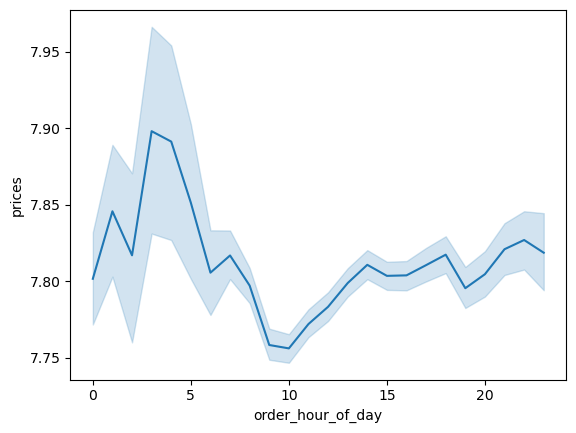

In [40]:
# Create a line chart from the data that represents 30% of the dataset.

line = sns.lineplot(data = df_combined_reduced_2, x = 'order_hour_of_day', y = 'prices')

In [41]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_line.png'))

### Question 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


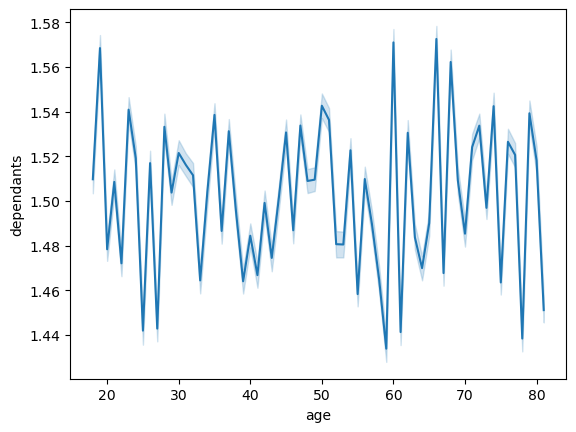

In [42]:
# Create a line chart from the data that represents 30% of the dataset.

line2 = sns.lineplot(data = small, x = 'age', y = 'dependants')

#### The line chart shows the number of dependants based on a customer's age. It appears that people around the age of 66 have the most number of dependants, about 1.57. People with ages of about 61 or 62 and about customers about the age of 19 also have a high number of dependants, at almost 1.57, too. Customers of age 59 have the least number of dependants, at around 1.42.

In [43]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_line2.png'))

### Question 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

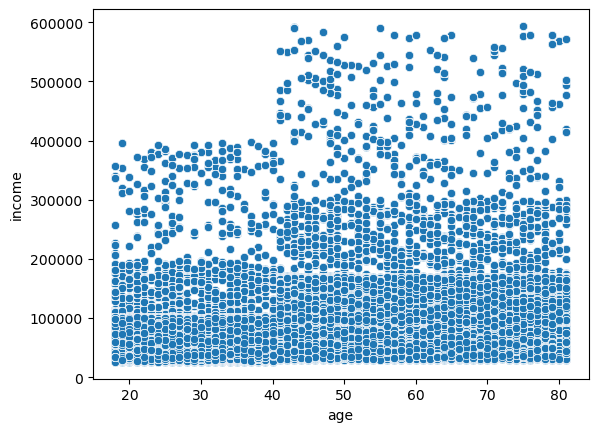

In [44]:
# Scatterplot

scatterplot = sns.scatterplot(x = 'age', y = 'income', data = small)

# small.dtypes

#### The absence of dots above the 400,000 income mark and to the left of the 40 year age group means that customers between the ages of 0 and 40 do not earn more than 400,000. Conversely, the presence of dots above the 400,000 and to the right of the 40 year age group means that people older than 40 earn more than 400,000. It appears that people of all age groups earn at least 180,000.

In [45]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ex_4-9_part_2_scatterplot.png'))

### Question 8 - Export your visualizations as “.png” files in your relevant project folder.

#### All of the visualizations have been exported in lines directly below each visualization.

In [47]:
# Export the notebook to Pickle format, file is about 7.13GB in size.

df_combined.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ex4-9-exercise-part-2.pkl'))